# Limpieza de datos
## Allan Mauricio Brenes Castro - A01750747

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("bike_buyers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1251 non-null   int64  
 1   Marital Status    1244 non-null   object 
 2   Gender            1238 non-null   object 
 3   Income            1243 non-null   object 
 4   Children          1238 non-null   float64
 5   Education         1251 non-null   object 
 6   Occupation        1251 non-null   object 
 7   Home Owner        1247 non-null   object 
 8   Cars              1242 non-null   float64
 9   Commute Distance  1251 non-null   object 
 10  Region            1251 non-null   object 
 11  Age               1238 non-null   float64
 12  Purchased Bike    1251 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 127.2+ KB


In [5]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12591,Married,Female,"30,000",4.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,45.0,No
1,14058,Single,Male,"70,000",0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,41.0,Yes
2,23962,Married,Female,"10,000",0.0,Partial High School,Manual,Yes,2.0,1-2 Miles,Europe,32.0,No
3,23419,Single,Female,"70,000",5.0,Bachelors,Professional,Yes,3.0,10+ Miles,Pacific,39.0,No
4,21940,Married,Male,"90,000",5.0,Graduate Degree,Professional,Yes,0.0,0-1 Miles,North America,47.0,Yes


In [6]:
df[df["ID"].duplicated()]["ID"]

57      20598
98      19562
116     11270
128     20380
133     20897
        ...  
1243    21770
1244    14193
1246    19364
1247    26305
1250    24201
Name: ID, Length: 251, dtype: int64

In [7]:
df = df.drop_duplicates()

In [8]:
df[df["ID"].duplicated()]["ID"]

Series([], Name: ID, dtype: int64)

In [9]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [10]:
df = df.dropna()

In [28]:
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [11]:
df.describe()

,ID,Children,Cars,Age
count,952.000000,952.000000,952.000000,952.000000
mean,19979.940126,1.898109,1.452731,44.256303
std,5334.000279,1.620426,1.111962,11.428167
min,11000.000000,0.000000,0.000000,25.000000
25%,15310.250000,0.000000,1.000000,35.000000
50%,19747.500000,2.000000,1.000000,43.000000
75%,24531.500000,3.000000,2.000000,52.000000
max,29447.000000,5.000000,4.000000,89.000000


In [12]:
df["Children"].median()

np.float64(2.0)

<Axes: ylabel='Density'>

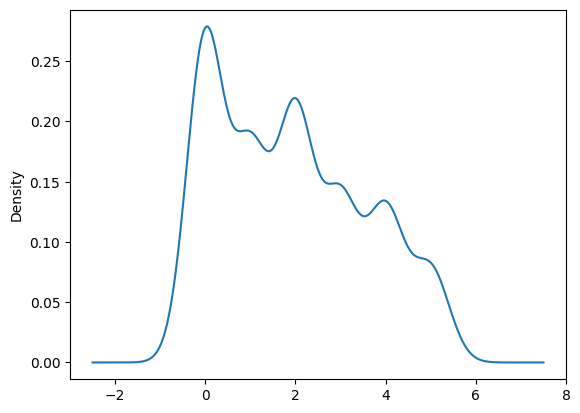

In [15]:
df["Children"].plot.kde()

In [21]:
object_columns = [col for col in df.columns if df[col].dtype == "O"]
for col in object_columns:
  df[col] = df[col].str.strip().str.replace("\n", " ").str.lower()

In [27]:
df.to_csv("bike_buyers_clean.csv", index=False)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                952 non-null    int64  
 1   Marital Status    952 non-null    object 
 2   Gender            952 non-null    object 
 3   Income            952 non-null    object 
 4   Children          952 non-null    float64
 5   Education         952 non-null    object 
 6   Occupation        952 non-null    object 
 7   Home Owner        952 non-null    object 
 8   Cars              952 non-null    float64
 9   Commute Distance  952 non-null    object 
 10  Region            952 non-null    object 
 11  Age               952 non-null    float64
 12  Purchased Bike    952 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 104.1+ KB


In [40]:
df["Income"] = pd.to_numeric(df["Income"].str.replace(",", ""))

AttributeError: Can only use .str accessor with string values!

In [41]:
df["Income"]

0        30000
1        70000
2        10000
3        70000
4        90000
         ...  
1241    100000
1242     40000
1245     10000
1248     40000
1249     30000
Name: Income, Length: 952, dtype: int64

In [42]:
df.to_csv("bike_buyers_clean.csv", index=False)

In [3]:
df = pd.read_csv("bike_buyers.csv")

In [4]:
dfc = pd.read_csv("bike_buyers_clean.csv")

In [5]:
print(df.describe())
print(dfc.describe())

                 ID     Children         Cars          Age
count   1251.000000  1238.000000  1242.000000  1238.000000
mean   20030.208633     1.929725     1.479066    44.058966
std     5331.451777     1.638977     1.121885    11.271138
min    11000.000000     0.000000     0.000000    25.000000
25%    15465.000000     0.000000     1.000000    35.000000
50%    19731.000000     2.000000     1.000000    43.000000
75%    24549.000000     3.000000     2.000000    52.000000
max    29447.000000     5.000000     4.000000    89.000000
                 ID         Income    Children        Cars         Age
count    952.000000     952.000000  952.000000  952.000000  952.000000
mean   19979.940126   55903.361345    1.898109    1.452731   44.256303
std     5334.000279   30845.483596    1.620426    1.111962   11.428167
min    11000.000000   10000.000000    0.000000    0.000000   25.000000
25%    15310.250000   30000.000000    0.000000    1.000000   35.000000
50%    19747.500000   60000.000000    2.000

<Axes: ylabel='Density'>

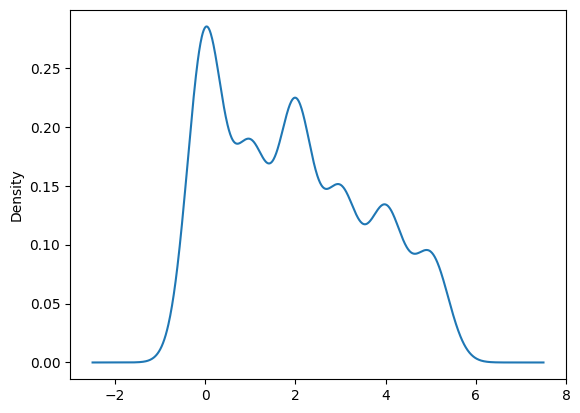

In [7]:
df["Children"].plot.kde()

<Axes: ylabel='Density'>

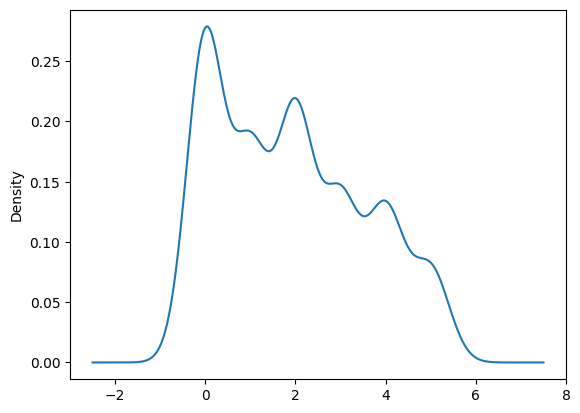

In [8]:
dfc["Children"].plot.kde()